### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# Check missing values
print("Missing Values Analysis:")
print("Total missing values per column:")
print(data.isnull().sum())
print("\nColumns with missing values:", data.columns[data.isnull().any()].tolist())
print("Total rows with missing values:", data.isnull().any(axis=1).sum())
      
# Check for duplicates
print("\n\nDuplicate Check:")
print("Number of duplicate rows:", data.duplicated().sum())

# Check for illogical values
print("\n\nData Validation Checks:")
# (1) Age validation
print("Age distribution:")
print(data['age'].value_counts().sort_index())

# (2) Temperature validation
print("\nTemperature values:")
print(data['temperature'].unique())

# (3) Time validation
print("\nTime values:")
print(data['time'].unique())

Missing Values Analysis:
Total missing values per column:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Columns with missing values: ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
Total rows with missing values: 

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
# Drop the 'car' column due to excessive missing values
data_cleaned = data.drop(columns=['car']).copy()

# Fill missing values in categorical columns 
columns_to_fill = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in columns_to_fill:
    most_frequent = data_cleaned[col].mode()[0]  # Get the most common value
    data_cleaned[col] = data_cleaned[col].fillna(most_frequent)  # Correct assignment

data_cleaned.info()

missing_values_after_cleaning = data_cleaned.isnull().sum()
duplicates_after_cleaning = data_cleaned.duplicated().sum()

print("Missing values after cleaning:\n", missing_values_after_cleaning)
print("\nNumber of duplicate rows after cleaning:", duplicates_after_cleaning)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

4. What proportion of the total observations chose to accept the coupon?



In [8]:
accept_coupon_proportion = data_cleaned['Y'].mean()
print(f"Proportion of observations that accepted the coupon: {accept_coupon_proportion:.2%}")

Proportion of observations that accepted the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

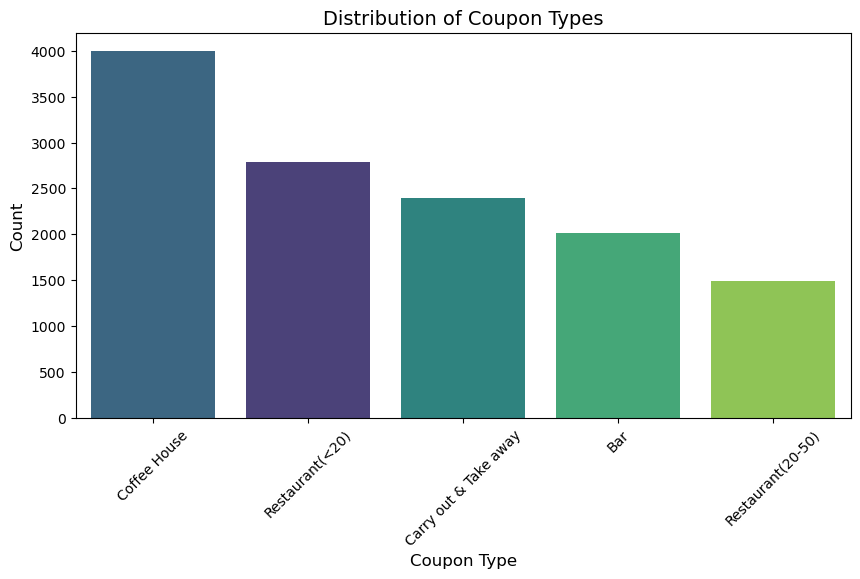

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(
    data=data_cleaned,
    x='coupon',
    order=data_cleaned['coupon'].value_counts().index,
    hue='coupon',  
    legend=False,  
    palette="viridis")

plt.title("Distribution of Coupon Types", fontsize=14)
plt.xlabel("Coupon Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)  

plt.show()

6. Use a histogram to visualize the temperature column.

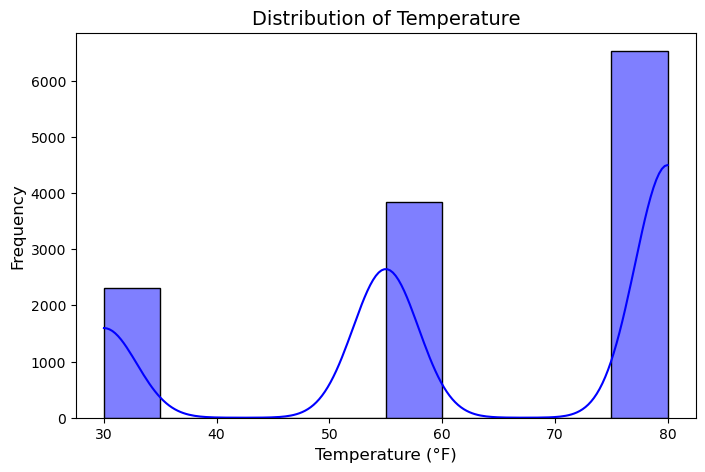

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data_cleaned, x='temperature', bins=10, kde=True, color="blue")
plt.title("Distribution of Temperature", fontsize=14)
plt.xlabel("Temperature (°F)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [11]:
bar_coupons_df = data_cleaned[data_cleaned['coupon'].str.contains("Bar", case=False, na=False)]
bar_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [12]:
bar_coupon_accept_rate = bar_coupons_df['Y'].mean()
print(f"Proportion of bar coupons were accepted: {bar_coupon_accept_rate:.2%}")

Proportion of bar coupons were accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [13]:
low_bar_frequency = ["0", "less1", "1~3"]
high_bar_frequency = ["4~8", "gt8"]

low_bar_visitors = bar_coupons_df[bar_coupons_df['Bar'].isin(low_bar_frequency)]
high_bar_visitors = bar_coupons_df[bar_coupons_df['Bar'].isin(high_bar_frequency)]

low_bar_accept_rate = low_bar_visitors['Y'].mean()
high_bar_accept_rate = high_bar_visitors['Y'].mean()

print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {low_bar_accept_rate:.2%}")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {high_bar_accept_rate:.2%}")

Acceptance rate for those who went to a bar 3 or fewer times a month: 52.74%
Acceptance rate for those who went to a bar more than 3 times a month: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [14]:
frequent_bar_categories = ["1~3", "4~8", "gt8"]  
age_over_25_categories = ["26-30", "31-35", "36-40", "41-50", "50plus"]  

frequent_bar_over_25 = bar_coupons_df[(bar_coupons_df['Bar'].isin(frequent_bar_categories)) & (bar_coupons_df['age'].isin(age_over_25_categories))]

all_others = bar_coupons_df[~bar_coupons_df.index.isin(frequent_bar_over_25.index)]

frequent_bar_over_25_acceptance = frequent_bar_over_25['Y'].mean()
all_others_acceptance = all_others['Y'].mean()

print(f"Acceptance rate for drivers who go to a bar more than once a month and are over 25: {frequent_bar_over_25_acceptance:.2%}")
print(f"Acceptance rate for all other drivers: {all_others_acceptance:.2%}")

Acceptance rate for drivers who go to a bar more than once a month and are over 25: 67.16%
Acceptance rate for all other drivers: 40.10%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [15]:
frequent_bar_categories = ["1~3", "4~8", "gt8"]  
not_passengers = ["kid(s)"] 
not_occupations = ["farming, fishing, or forestry"]  

drivers_frequent_bar_passenger_occupation = bar_coupons_df[(bar_coupons_df['Bar'].isin(frequent_bar_categories)) &
    (~bar_coupons_df['passanger'].isin(not_passengers)) & (~bar_coupons_df['occupation'].isin(not_occupations))]

all_others = bar_coupons_df[~bar_coupons_df.index.isin(drivers_frequent_bar_passenger_occupation.index)]

frequent_bar_acceptance = drivers_frequent_bar_passenger_occupation['Y'].mean()
all_others_acceptance = all_others['Y'].mean()

print(f"Acceptance rate for drivers who go to bars more than once a month, had no kid passengers, "
      f"and were not in farming, fishing, or forestry: {frequent_bar_acceptance:.2%}")
print(f"Acceptance rate for all other drivers: {all_others_acceptance:.2%}")

Acceptance rate for drivers who go to bars more than once a month, had no kid passengers, and were not in farming, fishing, or forestry: 68.79%
Acceptance rate for all other drivers: 29.35%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [18]:
frequent_bar_visitors = ["1~3", "4~8", "gt8"]  
non_kid_passengers = ["alone", "partner", "friend(s)"]  
not_widowed = [status for status in bar_coupons_df['maritalStatus'].unique() if "widowed" not in status] 
under_30 = ["below21", "21-25", "26-30"] 
cheap_restaurant_frequent_visitors = ["4~8", "gt8"]  
low_income = ["less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]  

first_group = bar_coupons_df[(bar_coupons_df['Bar'].isin(frequent_bar_visitors)) &
    (bar_coupons_df['passanger'].isin(non_kid_passengers)) & (bar_coupons_df['maritalStatus'].isin(not_widowed))]
second_group = bar_coupons_df[(bar_coupons_df['Bar'].isin(frequent_bar_visitors)) & (bar_coupons_df['age'].isin(under_30))]
third_group = bar_coupons_df[(bar_coupons_df['RestaurantLessThan20'].isin(cheap_restaurant_frequent_visitors)) & (bar_coupons_df['income'].isin(low_income))]

group1_acceptance = first_group['Y'].mean() if not first_group.empty else 0  
group2_acceptance = second_group['Y'].mean()
group3_acceptance = third_group['Y'].mean()

print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {group1_acceptance:.2%}")
print(f"Acceptance rate for drivers who go to bars more than once a month and are under 30: {group2_acceptance:.2%}")
print(f"Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and earn less than 50K: {group3_acceptance:.2%}")

Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 0.00%
Acceptance rate for drivers who go to bars more than once a month and are under 30: 40.00%
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and earn less than 50K: 45.76%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# 1.Frequent bar-goers are more likely to accept coupons: Drivers who visit bars more than three times a month exhibit higher acceptance rates compared to those who visit three or fewer times monthly.
# 2.Older frequent bar-goers (25+) show higher coupon acceptance: Drivers over 25 who frequent bars more than once a month accept coupons at higher rates than all other demographic groups.
# 3.Social drivers without children accept coupons more often: Coupon acceptance is elevated among drivers who visit bars frequently (>1x/month), travel with non-child passengers, and work outside farming, fishing, or forestry occupations.
# 4.Younger frequent bar-goers (<30) show some willingness to accept coupons: About 40% of drivers under 30 who visit bars more than once a month accept bar coupons.
# 5.Cost-conscious individuals favor coupons: Drivers earning under $50K annually and frequenting low-cost restaurants (4+ times/month) demonstrate higher bar coupon acceptance.
# 6.Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed would not accept the coupons. 


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [20]:
# Filter dataset for More Expensive Restaurant ($20 - $50) coupons
expensive_restaurant_coupons_df = data_cleaned[data_cleaned['coupon'].str.contains(r"Restaurant\(20-50\)", case=False, na=False)]
expensive_restaurant_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
14,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
18,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
40,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
58,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0


In [21]:
# Calculate overall acceptance rate for More Expensive Restaurant coupons
expensive_restaurant_coupon_acceptance_rate = expensive_restaurant_coupons_df['Y'].mean()

print(f"Overall acceptance rate for expensive restaurant coupons: {expensive_restaurant_coupon_acceptance_rate:.2%}")

Overall acceptance rate for expensive restaurant coupons: 44.10%


In [27]:
# Compare the acceptance rate between those who went to an expensive restaurant 3 or fewer times a month to those who went more.
low_expensive_restaurant_frequency = ["0", "less1", "1~3"]
high_expensive_restaurant_frequency = ["4~8", "gt8"]

low_expensive_restaurant_visitors = expensive_restaurant_coupons_df[expensive_restaurant_coupons_df['Bar'].isin(low_expensive_restaurant_frequency)]
high_expensive_restaurant_visitors = expensive_restaurant_coupons_df[expensive_restaurant_coupons_df['Bar'].isin(high_expensive_restaurant_frequency)]

low_expensive_restaurant_accept_rate = low_expensive_restaurant_visitors['Y'].mean()
high_expensive_restaurant_accept_rate = high_expensive_restaurant_visitors['Y'].mean()

print(f"Acceptance rate for those who went to more expensive restaurants 3 or fewer times a month: {low_expensive_restaurant_accept_rate:.2%}")
print(f"Acceptance rate for those who went to more expensive restaurants more than 3 times a month: {high_expensive_restaurant_accept_rate:.2%}")

Acceptance rate for those who went to more expensive restaurants 3 or fewer times a month: 44.14%
Acceptance rate for those who went to more expensive restaurants more than 3 times a month: 47.59%


In [24]:
# Compare the acceptance rate between drivers who go to an expensive restaurant more than once a month and are over the age of 25 to the all others. 

frequent_expensive_restaurant_categories = ["1~3", "4~8", "gt8"]  
age_over_25_categories = ["26-30", "31-35", "36-40", "41-50", "50plus"]  
frequent_expensive_restaurant_over_25 = expensive_restaurant_coupons_df[(expensive_restaurant_coupons_df['Bar'].isin(frequent_expensive_restaurant_categories)) & (expensive_restaurant_coupons_df['age'].isin(age_over_25_categories))]

all_others = expensive_restaurant_coupons_df[~expensive_restaurant_coupons_df.index.isin(frequent_expensive_restaurant_over_25.index)]

frequent_expensive_restaurant_over_25_acceptance = frequent_expensive_restaurant_over_25['Y'].mean()
all_others_acceptance = all_others['Y'].mean()

print(f"Acceptance rate for drivers who go to an expensive restaurant more than once a month and are over 25: {frequent_expensive_restaurant_over_25_acceptance:.2%}")
print(f"Acceptance rate for all other drivers: {all_others_acceptance:.2%}")

Acceptance rate for drivers who go to an expensive restaurant more than once a month and are over 25: 43.48%
Acceptance rate for all other drivers: 44.12%


In [25]:
# Use the same process to compare the acceptance rate between drivers who go to a more expensive restaurant more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
frequent_expensive_restaurant_categories = ["1~3", "4~8", "gt8"]  
not_passengers = ["kid(s)"] 
not_occupations = ["farming, fishing, or forestry"]  

drivers_frequent_expensive_restaurant_passenger_occupation = expensive_restaurant_coupons_df[(expensive_restaurant_coupons_df['Bar'].isin(frequent_expensive_restaurant_categories)) &
    (~expensive_restaurant_coupons_df['passanger'].isin(not_passengers)) & (~expensive_restaurant_coupons_df['occupation'].isin(not_occupations))]

all_others = expensive_restaurant_coupons_df[~expensive_restaurant_coupons_df.index.isin(drivers_frequent_expensive_restaurant_passenger_occupation.index)]

frequent_expensive_restaurant_acceptance = drivers_frequent_expensive_restaurant_passenger_occupation['Y'].mean()
all_others_acceptance = all_others['Y'].mean()

print(f"Acceptance rate for drivers who go to expensive restaurants more than once a month, had no kid passengers, "
      f"and were not in farming, fishing, or forestry: {frequent_expensive_restaurant_acceptance:.2%}")
print(f"Acceptance rate for all other drivers: {all_others_acceptance:.2%}")

Acceptance rate for drivers who go to expensive restaurants more than once a month, had no kid passengers, and were not in farming, fishing, or forestry: 47.45%
Acceptance rate for all other drivers: 42.65%


In [26]:
# Compare the acceptance rates between those drivers who:
# go to expensive restaurants more than once a month, had passengers that were not a kid, and were not widowed OR
# go to expensive restaurants more than once a month and are under the age of 30 OR
# go to cheap restaurants more than 4 times a month and income is less than 50K.

frequent_expensive_restaurant_visitors = ["1~3", "4~8", "gt8"]  
non_kid_passengers = ["alone", "partner", "friend(s)"]  
not_widowed = [status for status in expensive_restaurant_coupons_df['maritalStatus'].unique() if "widowed" not in status] 
under_30 = ["below21", "21-25", "26-30"] 
cheap_restaurant_frequent_visitors = ["4~8", "gt8"]  
low_income = ["less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]  

first_group = expensive_restaurant_coupons_df[
    (expensive_restaurant_coupons_df['Restaurant20To50'].isin(frequent_expensive_restaurant_visitors)) &
    (expensive_restaurant_coupons_df['passanger'].isin(non_kid_passengers)) &
    (expensive_restaurant_coupons_df['maritalStatus'].isin(not_widowed))
]
second_group = expensive_restaurant_coupons_df[
    (expensive_restaurant_coupons_df['Restaurant20To50'].isin(frequent_expensive_restaurant_visitors)) & 
    (expensive_restaurant_coupons_df['age'].isin(under_30))
]
third_group = expensive_restaurant_coupons_df[
    (expensive_restaurant_coupons_df['RestaurantLessThan20'].isin(cheap_restaurant_frequent_visitors)) &
    (expensive_restaurant_coupons_df['income'].isin(low_income))
]

group1_acceptance = first_group['Y'].mean() if not first_group.empty else 0  
group2_acceptance = second_group['Y'].mean()
group3_acceptance = third_group['Y'].mean()

print(f"Acceptance rate for drivers who go to expensive restaurants more than once a month, had passengers that were not a kid, and were not widowed: {group1_acceptance:.2%}")
print(f"Acceptance rate for drivers who go to expensive restaurants more than once a month and are under 30: {group2_acceptance:.2%}")
print(f"Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and earn less than 50K: {group3_acceptance:.2%}")


Acceptance rate for drivers who go to expensive restaurants more than once a month, had passengers that were not a kid, and were not widowed: 0.00%
Acceptance rate for drivers who go to expensive restaurants more than once a month and are under 30: 56.25%
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and earn less than 50K: 46.89%
